In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

In [2]:
base_risco_credito = pd.read_csv('risco_credito.csv')

In [3]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values


In [4]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()


In [6]:
X_risco_credito[:, 0] = label_enconder_historia.fit_transform(X_risco_credito[:, 0])

In [7]:
X_risco_credito[:, 1] = label_enconder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_enconder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_enconder_renda.fit_transform(X_risco_credito[:, 3])

In [8]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [9]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [10]:
X_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [11]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [12]:
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [13]:
print(previsao)

['baixo' 'moderado']


In [14]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [17]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [18]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [19]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [20]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

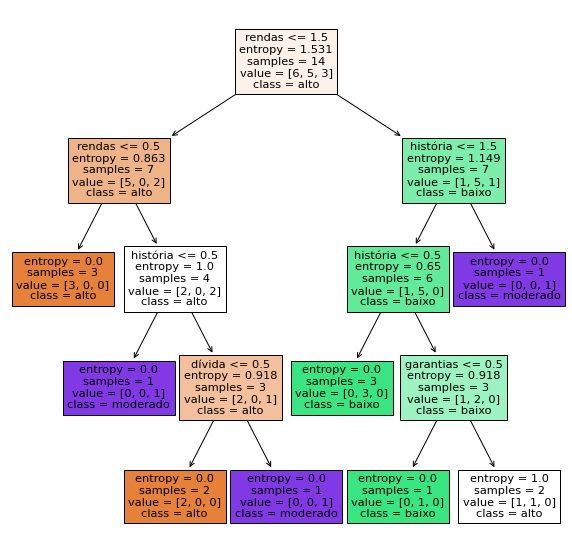

In [26]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'rendas']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_,filled=True);


In [27]:
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2, 0, 0, 0]])

In [28]:
previsoes

array(['baixo', 'alto'], dtype=object)

In [1]:
import Orange

ModuleNotFoundError: No module named 'Orange'